# EDA on Movielens dataset (small)

To get an first insight of the MovieLens dataset, we performed an explorative data analysis (EDA). In this notebook, we explored the data in respect to the movies, that it contains. An user-centered EDA analysis is done in another notebook (1b_EDA_Users.ipynb).

Questions, that we try to answer:

1. Which genres do the movies belong to?
2. When were the movies produced?
3. How are the movie ratings distributed?
4. Which genre got the best ratings and what are the most rated movies?
5. Identifying the time of rating: When do the people rate the movies?
6. How are the movies tagged?

The summary is found at the end the notebook (scroll down).



## Import of the Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

sns.set_style("whitegrid")

## Load the data

In [2]:
# load the data from MovieLens small dataset
df_movies = pd.read_csv("../content/movies.csv")
df_links = pd.read_csv("../content/links.csv")
df_ratings = pd.read_csv("../content/ratings.csv")
df_tags= pd.read_csv("../content/tags.csv")

In [3]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [5]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
# table with IDs to merge with the Imdb, we will not use that df here in the EDA
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


### How many movies are in the dataset?

In [7]:
df_movies["title"].nunique()

9737

# 1. Which genres do the movies belong to?

## First we need to split the genres df_movies into single rows

In [8]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [9]:
# splitting genres in different columns
genres = pd.DataFrame(df_movies.genres.str.split("|").to_list()).stack().unique()
genres

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [10]:
# How many genres are there?
len(genres)

20

In [11]:
df_movies["genre"] = df_movies.genres.str.split("|").to_list()
df_movies


,movieId,title,genres,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,"[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,"[Animation, Comedy, Fantasy]"
9739,193585,Flint (2017),Drama,[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,"[Action, Animation]"


In [12]:
#For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in df_movies.iterrows():
    for genre in row['genre']:
        df_movies.at[index, genre] = 1
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
df_movies = df_movies.fillna(0)
df_movies.head()

,movieId,title,genres,genre,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# drop the genre columns
df_movies.drop("genres", axis=1, inplace=True)
df_movies.drop("genre", axis=1, inplace=True)
df_movies.head()

,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# aggregating the genres by summing and assigning a new dataframe
genre_plot = pd.DataFrame(df_movies.iloc[:,2:22].agg(sum)).reset_index()
genre_plot.columns = ["genre", 'movies']
genre_plot = genre_plot.sort_values(by="movies", ascending=False)
genre_plot

,genre,movies
6,Drama,4361.0
3,Comedy,3756.0
9,Thriller,1894.0
7,Action,1828.0
5,Romance,1596.0
0,Adventure,1263.0
8,Crime,1199.0
12,Sci-Fi,980.0
10,Horror,978.0
4,Fantasy,779.0


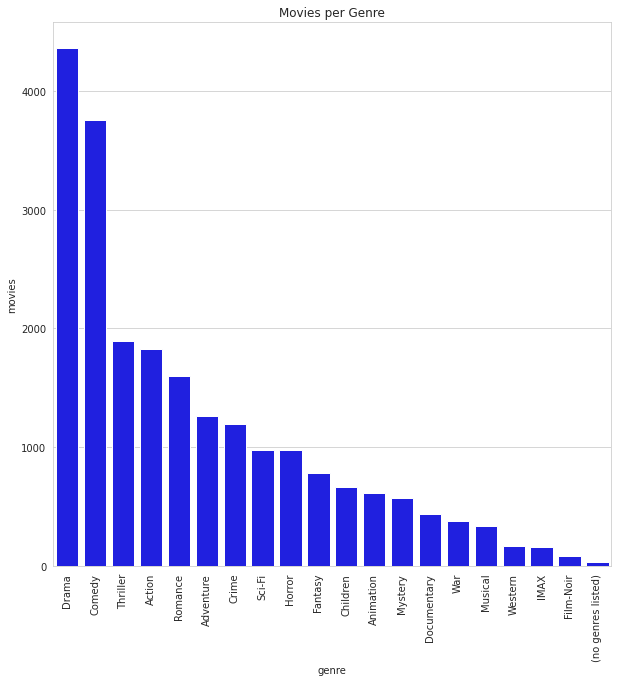

In [15]:
# plotting the genres
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=genre_plot.genre, y=genre_plot.movies, color="blue")
ax.set_title("Movies per Genre")
plt.xticks(rotation=90);

# 2. When were the movies produced?

## Extract year from title

In [16]:
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
df_movies['year'] = df_movies.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
df_movies['year'] = df_movies.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
df_movies['title'] = df_movies.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
df_movies['title'] = df_movies['title'].apply(lambda x: x.strip())
df_movies.head()

,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),year
0,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
1,2,Jumanji,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
2,3,Grumpier Old Men,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
3,4,Waiting to Exhale,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
4,5,Father of the Bride Part II,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995


In [17]:
# make a dataframe for years
df_years = df_movies.groupby("year").count().reset_index()
df_years.drop(df_years.tail(1).index, inplace=True) # drop last row, because data for 2018 are not complete
df_years

,year,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1902,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1903,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1908,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1915,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1916,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2013,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239
101,2014,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278
102,2015,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274
103,2016,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218


In [18]:
df_years.tail(1)

,year,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
104,2017,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147


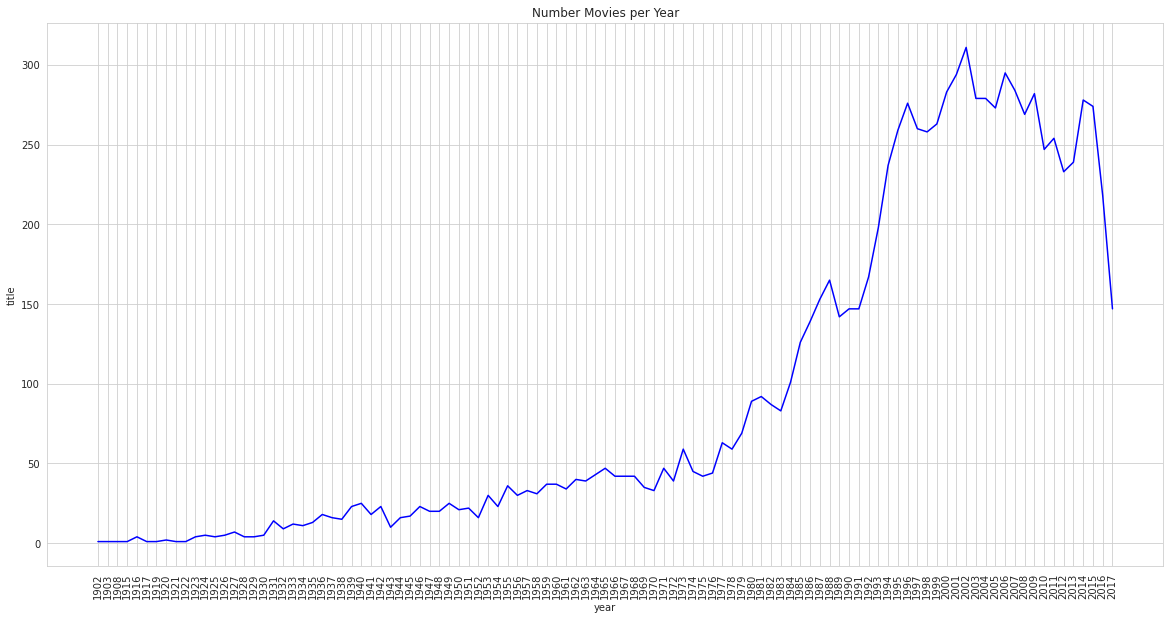

In [19]:
# plotting the years
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x=df_years.year, y=df_years.title, color="blue")
ax.set_title("Number Movies per Year")
plt.xticks(rotation=90);

# 3. How are the movie ratings distributed?

## Merge the movie table with the ratings

In [20]:
# merging
df_rating = df_movies.merge(df_ratings, on="movieId", how="inner")
df_rating.head(5)

,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),year,userId,rating,timestamp
0,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,1,4.0,964982703
1,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,5,4.0,847434962
2,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,7,4.5,1106635946
3,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,15,2.5,1510577970
4,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,17,4.5,1305696483


## Calculate basic statistics of the ratings



In [43]:
# calculate desriptive statistics for the movie ratings
df_rating[["title", "rating"]].describe()

,rating
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


Text(0.5, 1.0, 'Distribution of the ratings')

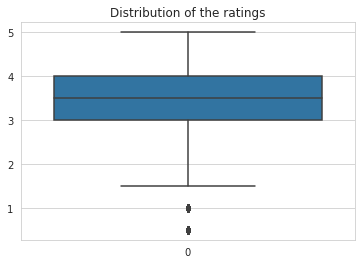

In [45]:
# plot the distribution of the ratings in a boxplot 
sns.boxplot(data = df_rating["rating"]).set_title("Distribution of the ratings")

###  The mean and the median (50%) of the ratings map each other. However, the distribution of the data is skewed towards higher ratings, meaning low ratings were given less frequent. According to this, we use in the following the median of the ratings, since it is more robust to outliers and represents the center of the rating much better.

### Calculate the median rating for each movie

In [21]:
median_rating = df_rating.groupby("title").median().reset_index()

In [22]:
median_rating.head()

,title,movieId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),userId,rating,timestamp
0,'71,117867.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,610.0,4.0,1.493850e+09
1,'Hellboy': The Seeds of Creation,97757.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,332.0,4.0,1.352671e+09
2,'Round Midnight,26564.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,354.5,3.5,1.346507e+09
3,'Salem's Lot,27751.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,345.0,5.0,1.342827e+09
4,'Til There Was You,779.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,229.0,4.0,1.161440e+09


### Plotting the medial distribution of movie ratings

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


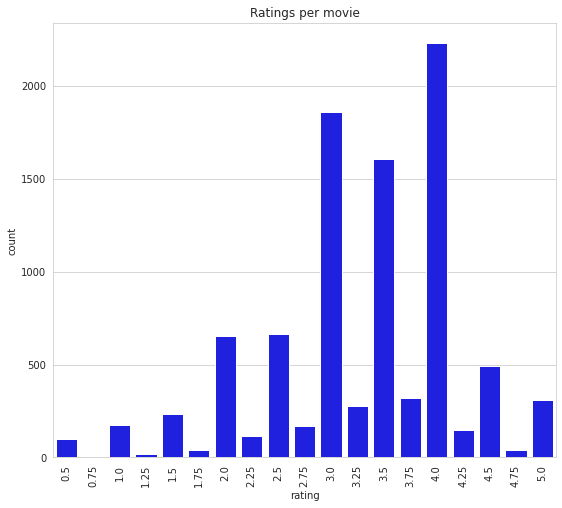

In [23]:
fig, ax = plt.subplots(figsize=(9,8))
sns.countplot(median_rating.rating, color="blue")
ax.set_title("Ratings per movie")
plt.xticks(rotation=90);


In [36]:
median_rating.sort_values(by="rating", ascending=False).head(5)

,title,movieId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),userId,rating,timestamp
2441,Down Argentine Way,83969.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0,5.0,1.520409e+09
7437,Siam Sunset,6402.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0,5.0,1.520409e+09
3867,Hollywood Shuffle,4116.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,5.0,1.049077e+09
3863,Hollywood Chainsaw Hookers,140133.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0,5.0,1.520410e+09
7405,Shogun Assassin,5244.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187.0,5.0,1.161850e+09


### Most movies in the dataset received a rating between 3.0 and 4.0.

# 4. Which genre got the best ratings and what are the most rated movies?

## Top genres

In [25]:
# check all movies that have median rating of 5.0
top_rated_genre = median_rating.query("rating >= 5")
top_rated_genre[["title", "rating"]][0:10]

,title,rating
3,'Salem's Lot,5.0
66,20 Million Miles to Earth,5.0
127,61*,5.0
131,7 Faces of Dr. Lao,5.0
144,9/11,5.0
152,A Detective Story,5.0
154,A Flintstones Christmas Carol,5.0
163,A Perfect Day,5.0
165,A Plasticine Crow,5.0
210,"Act of Killing, The",5.0


In [26]:
# aggregating the genres by summing and assigning a new dataframe
genre_plot2 = pd.DataFrame(top_rated_genre.iloc[:,2:22].agg(sum)).reset_index()
genre_plot2.columns = ["genre", 'movies']
genre_plot2 = genre_plot2.sort_values(by="movies", ascending=False)
genre_plot2

,genre,movies
3,Comedy,146.0
6,Drama,123.0
1,Animation,65.0
5,Romance,50.0
10,Horror,30.0
4,Fantasy,30.0
8,Crime,30.0
15,Documentary,30.0
2,Children,29.0
7,Action,26.0


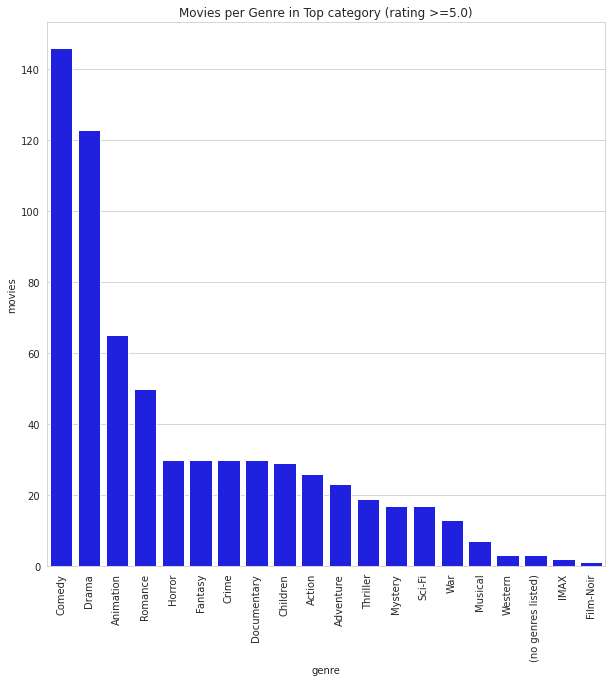

In [27]:
# plotting the top movies genres
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=genre_plot2.genre, y=genre_plot2.movies, color="blue")
ax.set_title("Movies per Genre in Top category (rating >=5.0)")
plt.xticks(rotation=90);

### The most and best rated genres are comedy, drama and animation.

## Which movies received the most ratings?
What are the TOP 10 and 10 worst movies?

In [46]:
# groupby the movie title and count them, then sort 
most_rated = df_rating.groupby("title").sum().reset_index()
most_rated = most_rated.sort_values(by="rating", ascending=False)
most_rated[["title", "rating"]].head(10)

,title,rating
7368,"Shawshank Redemption, The",1404.0
3072,Forrest Gump,1370.0
6657,Pulp Fiction,1288.5
5348,"Matrix, The",1165.5
7454,"Silence of the Lambs, The",1161.0
7767,Star Wars: Episode IV - A New Hope,1062.0
1301,Braveheart,955.5
2931,Fight Club,931.5
7199,Schindler's List,929.5
4521,Jurassic Park,892.5


In [47]:
# worst movies
most_rated = most_rated.sort_values(by="rating", ascending=True)
most_rated[["title", "rating"]].head(10)

,title,rating
7617,Son of God,0.5
7945,Superfast!,0.5
8220,The Emoji Movie,0.5
569,Are We There Yet?,0.5
4050,I Know Who Killed Me,0.5
9274,Wizards of the Lost Kingdom II,0.5
1510,Captain America II: Death Too Soon,0.5
1389,"Brothers Solomon, The",0.5
5294,Maria Bamford: The Special Special Special!,0.5
9427,Zombie Strippers!,0.5


# 5. Identifying the time of rating: When do the people rate the movies?

In [48]:
# converting timestamp to time
df_rating["rating_time"]= pd.to_datetime(df_rating['timestamp'], unit='s')

In [52]:
df_rating[["title", "rating_time"]].head()

,title,rating_time
0,Toy Story,2000-07-30 18:45:03
1,Toy Story,1996-11-08 06:36:02
2,Toy Story,2005-01-25 06:52:26
3,Toy Story,2017-11-13 12:59:30
4,Toy Story,2011-05-18 05:28:03


## daytime of the rating

In [57]:
df_rating['time_hour'] = df_rating['rating_time'].dt.hour
df_rating[["title", "time_hour"]]

,title,time_hour
0,Toy Story,18
1,Toy Story,6
2,Toy Story,6
3,Toy Story,12
4,Toy Story,5
...,...,...
100831,Black Butler: Book of the Atlantic,14
100832,No Game No Life: Zero,14
100833,Flint,14
100834,Bungo Stray Dogs: Dead Apple,15


In [60]:
# groupimg by the hour of rating
df_hour = df_rating[["title", "time_hour"]].groupby("time_hour").count().reset_index()
df_hour

,time_hour,title
0,0,4481
1,1,4959
2,2,5135
3,3,4257
4,4,3274
5,5,2566
6,6,2168
7,7,3633
8,8,3130
9,9,2356


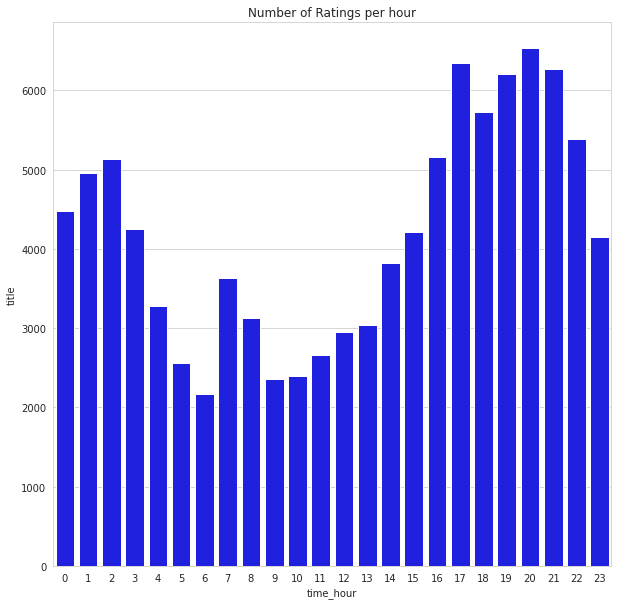

In [62]:
# plotting the number of ratings per hour on a day
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=df_hour.time_hour, y=df_hour.title, color="blue")
ax.set_title("Number of Ratings per hour");


### The majority of the movies has been rated in the evening (between 16 and 22 o'clock).

# 6. How are the movies tagged?

In [33]:
# merge the tags with the df_movie
df_tag = df_movies.merge(df_tags, on="movieId", how="inner")
df_tag.head(5)

,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),year,userId,tag,timestamp
0,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,336,pixar,1139045764
1,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,474,pixar,1137206825
2,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,567,fun,1525286013
3,2,Jumanji,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,62,fantasy,1528843929
4,2,Jumanji,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,62,magic board game,1528843932


### How many movies were tagged by users?

In [35]:
df_tag["title"].nunique()

1560

### Only 1560 of 9461 movies have been tagged by users. For our purpose to build a recommender engine, the sparse tags are of no use. Hence, we will not proceed working with the tags.

# Summary


**1. Which genres do the movies belong to?** <br>
The movies are categorized in 20 different genres. Most movies belong drama, followed the comedy and thriller.

**2. When were the movies produced?**<br>
The dataset contains movies produced between 1902 to 2017. The majority has been produced in the last two decades (1997 to 2017).

**3. How are the movie ratings distributed?** <br>
Most movies in the dataset received a rating between 3.0 and 4.0. The median of the rating is 3.5. The data are skewed towards higher rating.

**4. Which genre got the best ratings and what are the most rated movies?**  <br>
The most and best rated genres are comedy, drama and animation.
The TOP 10 movies are:<br>

The Shawshank Redemption<br>
Forrest Gump <br>
Pulp Fiction <br>
The Matrix <br>
The Silence of the Lambs<br>
Star Wars: Episode IV - A New Hope <br>
Braveheart <br>
Fight Club 	<br>
Schindler's List<br>
Jurassic Park <br>

**5. Identifying the time of rating: When do the people rate the movies?** <br>
The majority of the movies has been rated in the evening(between 16 and 22 o'clock).

**6. How are the movies tagged?**<br>
Only 1560 of 9461 movies have been tagged by users. Hence, the tags will not be further analysed. 

